In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
#Load datasets
athleteEvents = pd.read_csv('athlete_events.csv')
countries = pd.read_csv('countries.csv')
nocRegions = pd.read_csv('noc_regions.csv')

In [3]:
countries

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0","259,5",10,15,75,2,"22,46","3,27",NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0","497,2","2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,"145,2","16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63"
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,NaN,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4"
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2","37,2","2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393"
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6","8,2","7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489"


In [4]:
nocRegions

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN
...,...,...,...
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN


In [5]:
#To get the dataframe we want:
#Clean dataframes
#1. Remove white spaces in the "Country" column of countries dataframe at both ends
countries['Country'] = countries['Country'].str.strip()

In [6]:
#2. Rename the "region" column to "Country" in dataframe noc to join dataframe countries on the same column
nocRegions.rename(columns={"region": "Country"}, inplace = True)

In [7]:
#3. Clean the "Country" column in noc to match the Country column in dataframe countries

nocRegions[['Country']] = nocRegions[['Country']].replace(to_replace ='Curacao', value = 'Netherlands Antilles', regex = True)
nocRegions[['Country']] = nocRegions[['Country']].replace(to_replace ='Antigua', value = 'Antigua and Barbuda', regex = True)   
nocRegions[['Country']] = nocRegions[['Country']].replace(to_replace ='Virgin Islands, US', value = 'United States', regex = True)          
nocRegions[['Country']] = nocRegions[['Country']].replace(to_replace ='Virgin Islands, British', value = 'United Kingdom', regex = True)          
nocRegions[['Country']] = nocRegions[['Country']].replace(to_replace ='Saint Kitts', value = 'Saint Kitts & Nevis', regex = True)          
nocRegions[['Country']] = nocRegions[['Country']].replace(to_replace ='Trinidad', value = 'Trinidad and Tobago', regex = True)          
nocRegions[['Country']] = nocRegions[['Country']].replace(to_replace ='USA', value = 'United States', regex = True) 
nocRegions[['Country']] = nocRegions[['Country']].replace(to_replace ='UK', value = 'United Kingdom', regex = True)
nocRegions[['Country']] = nocRegions[['Country']].replace(to_replace ='Trinidad', value = 'Trinidad and Tobago', regex = True)

In [8]:
#Also remove the white spaces in the "Country" column at both ends here (in order to join)
nocRegions['Country'] = nocRegions['Country'].str.strip()

In [9]:
#4. Create "Total GDP" column in the dataframe country 
countries['Total GDP'] = countries['GDP ($ per capita)']*countries['Population']
countries

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),...,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Total GDP
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0",...,"12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38",2.173990e+10
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5",...,"21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579",1.611745e+10
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0",...,"3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298",1.975805e+11
3,American Samoa,OCEANIA,57794,199,"290,4","58,29","-20,71","9,27",8000.0,"97,0",...,10,15,75,2,"22,46","3,27",NaN,NaN,NaN,4.623520e+08
4,Andorra,WESTERN EUROPE,71201,468,"152,1","0,00","6,6","4,05",19000.0,"100,0",...,"2,22",0,"97,78",3,"8,71","6,25",NaN,NaN,NaN,1.352819e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,West Bank,NEAR EAST,2460492,5860,"419,9","0,00","2,98","19,62",800.0,NaN,...,"16,9","18,97","64,13",3,"31,67","3,92","0,09","0,28","0,63",1.968394e+09
223,Western Sahara,NORTHERN AFRICA,273008,266000,"1,0","0,42",NaN,NaN,NaN,NaN,...,"0,02",0,"99,98",1,NaN,NaN,NaN,NaN,"0,4",NaN
224,Yemen,NEAR EAST,21456188,527970,"40,6","0,36",0,"61,5",800.0,"50,2",...,"2,78","0,24","96,98",1,"42,89","8,3","0,135","0,472","0,393",1.716495e+10
225,Zambia,SUB-SAHARAN AFRICA,11502010,752614,"15,3","0,00",0,"88,29",800.0,"80,6",...,"7,08","0,03","92,9",2,41,"19,93","0,22","0,29","0,489",9.201608e+09


In [10]:
#Join dataframes
#1. First join athleteEvents with nocRegions on NOC column

join1 = athleteEvents.merge(nocRegions, how='left', on='NOC')
join1.head()

#note: Some people might ne wondering why we have to join NOC code's data to the athletes data when we 
#have the "team" column, which represents the country of an athlete. The reason is that from 1970-2017, 
#Russia and its former Soviet Union had different names throughout this period, for example, in 1992, 
#athletes are representing the Unified Team, which we would identify it as part of Russia, which we have to 
#use its NOC code to join and categorize it as Russia.

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,Country,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [11]:
#2. Then join countries on column "Country"
join2 = join1.merge(countries, how='left', on='Country')
join2[["ID","Name","Sex","Age","Region"]]

,ID,Name,Sex,Age,Region
0,1,A Dijiang,M,24.0,ASIA (EX. NEAR EAST)
1,2,A Lamusi,M,23.0,ASIA (EX. NEAR EAST)
2,3,Gunnar Nielsen Aaby,M,24.0,WESTERN EUROPE
3,4,Edgar Lindenau Aabye,M,34.0,WESTERN EUROPE
4,5,Christine Jacoba Aaftink,F,21.0,WESTERN EUROPE
...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,EASTERN EUROPE
271112,135570,Piotr ya,M,27.0,EASTERN EUROPE
271113,135570,Piotr ya,M,27.0,EASTERN EUROPE
271114,135571,Tomasz Ireneusz ya,M,30.0,EASTERN EUROPE


In [12]:
join2

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,...,Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Total GDP
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,...,"15,4","1,25","83,35","1,5","13,25","6,97","0,125","0,473","0,403",6.569869e+12
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,...,"15,4","1,25","83,35","1,5","13,25","6,97","0,125","0,473","0,403",6.569869e+12
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,...,"54,02","0,19","45,79",3,"11,13","10,36","0,018","0,246","0,735",1.695156e+11
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,...,"54,02","0,19","45,79",3,"11,13","10,36","0,018","0,246","0,735",1.695156e+11
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,...,"26,71","0,97","72,32",3,"10,9","8,68","0,021","0,244","0,736",4.716558e+11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,...,"45,91","1,12","52,97",3,"9,85","9,89","0,05","0,311","0,64",4.277592e+11
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,...,"45,91","1,12","52,97",3,"9,85","9,89","0,05","0,311","0,64",4.277592e+11
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,...,"45,91","1,12","52,97",3,"9,85","9,89","0,05","0,311","0,64",4.277592e+11
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,...,"45,91","1,12","52,97",3,"9,85","9,89","0,05","0,311","0,64",4.277592e+11


In [13]:
import numpy as np
import pandas as pd
from scipy.stats import norm  
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#Q1
#What is the distribution of the total medals won by different countries? 
#Is it true that countries from Europe or North America tend to win more medals?

In [15]:
#Step 1, select the columns that we want: "Country", "Region", and Medal
Q1 = join2[["Country","Region","Season", "Medal"]]
Q1.head()

,Country,Region,Season,Medal
0,China,ASIA (EX. NEAR EAST),Summer,NaN
1,China,ASIA (EX. NEAR EAST),Summer,NaN
2,Denmark,WESTERN EUROPE,Summer,NaN
3,Denmark,WESTERN EUROPE,Summer,Gold
4,Netherlands,WESTERN EUROPE,Winter,NaN


In [16]:
#In order to count total medals and different types of medals, we create four additional columns 

Q1["Total Medals"]= Q1["Medal"]

#Use map to turn Gold, Silver, Bronze all to 1
Q1["Total Medals"]= Q1["Total Medals"].map({'Gold': 1, 'Silver': 1, 'Bronze':1})

#Then turn NaN values to 0
Q1["Total Medals"]= Q1["Total Medals"].fillna(0)

Q1

/var/folders/f6/z0d78nj136d487t0dd3bdyh00000gn/T/ipykernel_525/1622187542.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q1["Total Medals"]= Q1["Medal"]
/var/folders/f6/z0d78nj136d487t0dd3bdyh00000gn/T/ipykernel_525/1622187542.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q1["Total Medals"]= Q1["Total Medals"].map({'Gold': 1, 'Silver': 1, 'Bronze':1})
/var/folders/f6/z0d78nj136d487t0dd3bdyh00000gn/T/ipykernel_525/1622187542.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

,Country,Region,Season,Medal,Total Medals
0,China,ASIA (EX. NEAR EAST),Summer,NaN,0.0
1,China,ASIA (EX. NEAR EAST),Summer,NaN,0.0
2,Denmark,WESTERN EUROPE,Summer,NaN,0.0
3,Denmark,WESTERN EUROPE,Summer,Gold,1.0
4,Netherlands,WESTERN EUROPE,Winter,NaN,0.0
...,...,...,...,...,...
271111,Poland,EASTERN EUROPE,Winter,NaN,0.0
271112,Poland,EASTERN EUROPE,Winter,NaN,0.0
271113,Poland,EASTERN EUROPE,Winter,NaN,0.0
271114,Poland,EASTERN EUROPE,Winter,NaN,0.0


In [17]:
#Drop the columns that do not win any medals, so we can count the total medals for each country
droppedQ1 = Q1.dropna()

<AxesSubplot:xlabel='Country', ylabel='Count'>

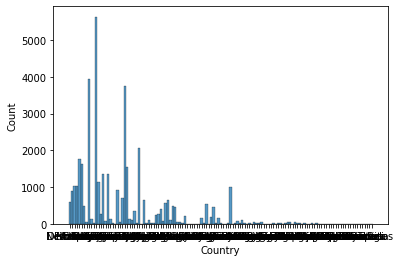

In [18]:
#Use histplot:
sns.histplot(data=droppedQ1, x="Country")

[Text(0.5, 1.0, 'Total Medals Won Across Different Countries')]

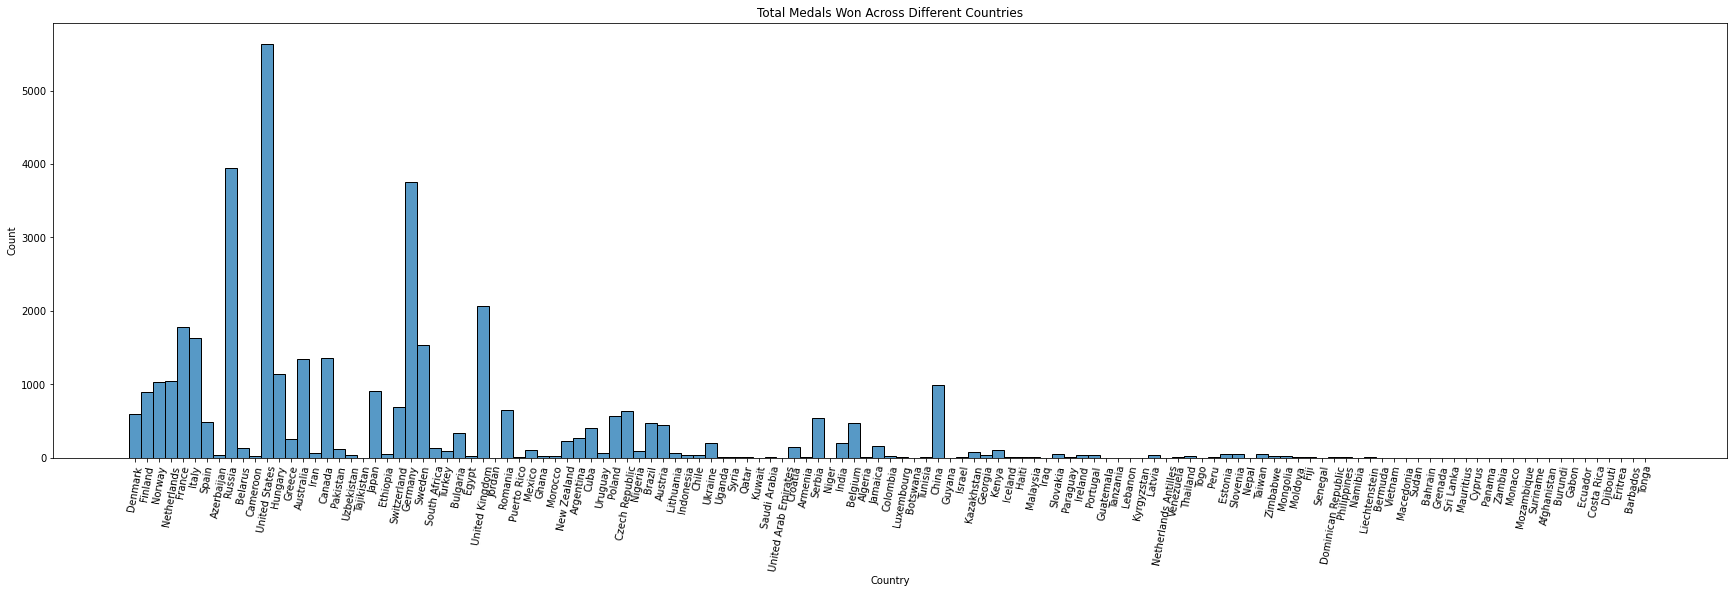

In [19]:
#Beacuse the x-axis labels are squeezed together, we change the plot format to make it more visible
plt.figure(figsize = (30,8))
plt.xticks(rotation=80)
sns.histplot(data=droppedQ1, x="Country").set(title='Total Medals Won Across Different Countries')

[Text(0.5, 1.0, 'Total Medals Won Across Different Countries')]

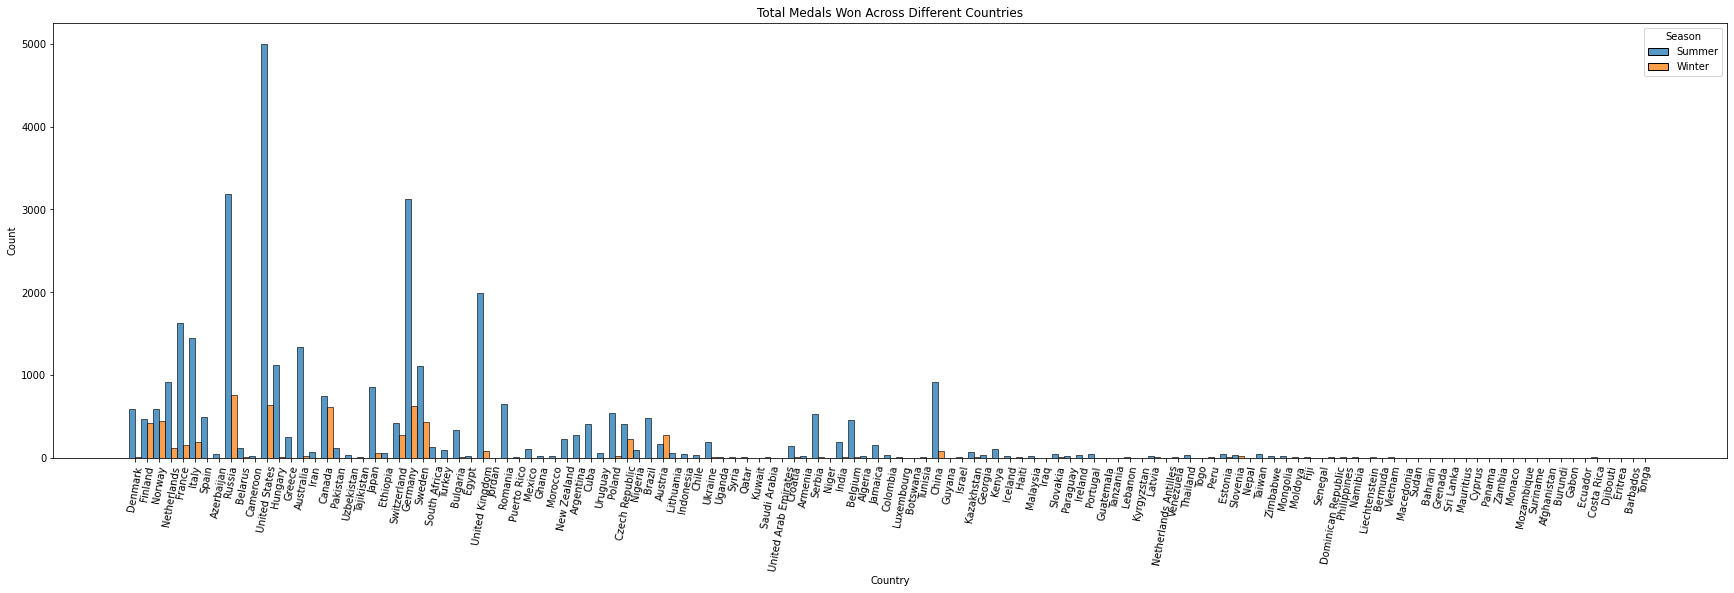

In [20]:
#Because this is the toal medals combined in summer and winter olmpics, 
#let's use hue="Season" and multiple="dodge" to sort them out

plt.figure(figsize = (30,8))
plt.xticks(rotation=80)
sns.histplot(data=droppedQ1, x="Country", hue="Season", multiple="dodge").set(title='Total Medals Won Across Different Countries')

<AxesSubplot:title={'center':'Total Medals Won For Different Countries(Over 500)'}, xlabel='Country'>

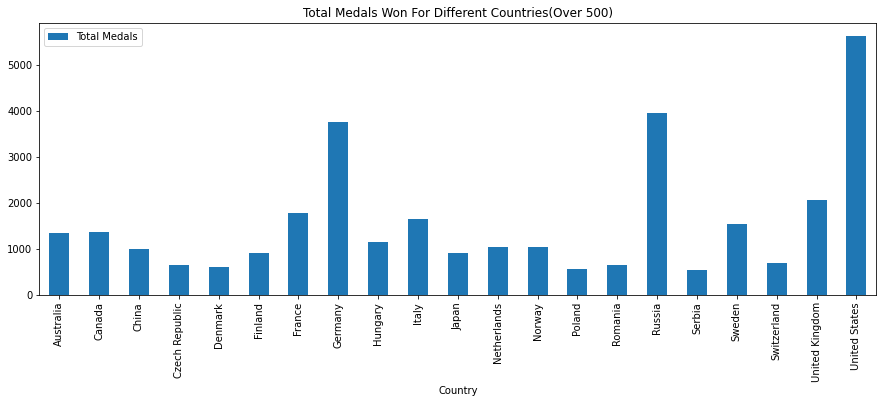

In [21]:
#Because there are too many countries, let's try to filter out the countries that count are < 500
grouped = droppedQ1.groupby(['Country'])[['Total Medals']].sum()
filtered = grouped[grouped['Total Medals'] >= 500]
filtered.plot(kind='bar', title='Total Medals Won For Different Countries(Over 500)', figsize=(15,5))

In [22]:
droppedQ1

,Country,Region,Season,Medal,Total Medals
3,Denmark,WESTERN EUROPE,Summer,Gold,1.0
37,Finland,WESTERN EUROPE,Summer,Bronze,1.0
38,Finland,WESTERN EUROPE,Summer,Bronze,1.0
40,Finland,WESTERN EUROPE,Winter,Bronze,1.0
41,Finland,WESTERN EUROPE,Summer,Bronze,1.0
...,...,...,...,...,...
271078,Russia,C.W. OF IND. STATES,Summer,Silver,1.0
271080,Russia,C.W. OF IND. STATES,Summer,Bronze,1.0
271082,Poland,EASTERN EUROPE,Summer,Bronze,1.0
271102,Russia,C.W. OF IND. STATES,Summer,Bronze,1.0


In [23]:
droppedQ1["Region"].unique()

array(['WESTERN EUROPE                     ', 'C.W. OF IND. STATES ',
       'SUB-SAHARAN AFRICA                 ',
       'NORTHERN AMERICA                   ',
       'EASTERN EUROPE                     ',
       'OCEANIA                            ',
       'ASIA (EX. NEAR EAST)         ',
       'NEAR EAST                          ',
       'NORTHERN AFRICA                    ', 'LATIN AMER. & CARIB    ',
       'BALTICS                            '], dtype=object)

/var/folders/f6/z0d78nj136d487t0dd3bdyh00000gn/T/ipykernel_525/3485415750.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  droppedQ1['Region'] = droppedQ1['Region'].str.strip()
/var/folders/f6/z0d78nj136d487t0dd3bdyh00000gn/T/ipykernel_525/3485415750.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  droppedQ1["Region"] = droppedQ1["Region"].replace({'ASIA (EX. NEAR EAST)':'ASIA', 'LATIN AMER. & CARIB':'LATIN AMERICA', 'SUB-SAHARAN AFRICA':'AFRICA', 'NORTHERN AFRICA':'AFRICA'})


[Text(0.5, 1.0, 'Total Medals Won by Different Regions')]

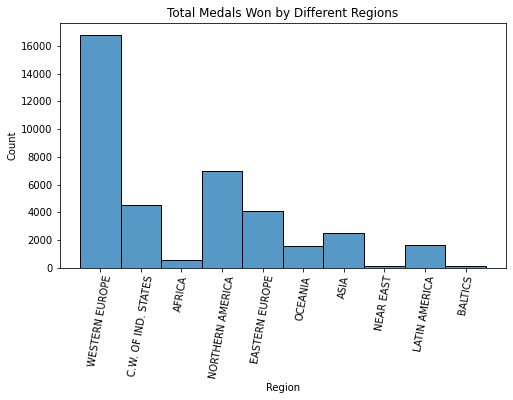

In [24]:
#Find the distribution of the total medals won in different regions 
droppedQ1

#There are also some white spaces in the "Region" column, let's clean them up:
droppedQ1['Region'] = droppedQ1['Region'].str.strip()

#Rename the region names 
droppedQ1["Region"] = droppedQ1["Region"].replace({'ASIA (EX. NEAR EAST)':'ASIA', 'LATIN AMER. & CARIB':'LATIN AMERICA', 'SUB-SAHARAN AFRICA':'AFRICA', 'NORTHERN AFRICA':'AFRICA'})

plt.figure(figsize = (8,4.5))
plt.xticks(rotation=80)
sns.histplot(data=droppedQ1, x="Region").set(title='Total Medals Won by Different Regions')

In [25]:
#Create A Mosaic Plotfor differtnet Regions with regard to whether win medal or not:

In [26]:
#Create A Column That Shows Win Medals or Not
Q1["WinMedalsOrNot"] = Q1['Medal'].map({'Gold': True, 'Silver': True, 'Bronze':True, np.nan: False})

#There are also some white spaces in the "Region" column, let's clean them up:
Q1['Region'] = Q1['Region'].str.strip()

#Rename the region names 
Q1["Region"] = Q1["Region"].replace({'ASIA (EX. NEAR EAST)':'ASIA', 'LATIN AMER. & CARIB':'LATIN AMERICA', 'SUB-SAHARAN AFRICA':'AFRICA', 'NORTHERN AFRICA':'AFRICA'})
Q1

/var/folders/f6/z0d78nj136d487t0dd3bdyh00000gn/T/ipykernel_525/156346222.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q1["WinMedalsOrNot"] = Q1['Medal'].map({'Gold': True, 'Silver': True, 'Bronze':True, np.nan: False})
/var/folders/f6/z0d78nj136d487t0dd3bdyh00000gn/T/ipykernel_525/156346222.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q1['Region'] = Q1['Region'].str.strip()
/var/folders/f6/z0d78nj136d487t0dd3bdyh00000gn/T/ipykernel_525/156346222.py:8: SettingWithCopyWarning: 
A value is trying

,Country,Region,Season,Medal,Total Medals,WinMedalsOrNot
0,China,ASIA,Summer,NaN,0.0,False
1,China,ASIA,Summer,NaN,0.0,False
2,Denmark,WESTERN EUROPE,Summer,NaN,0.0,False
3,Denmark,WESTERN EUROPE,Summer,Gold,1.0,True
4,Netherlands,WESTERN EUROPE,Winter,NaN,0.0,False
...,...,...,...,...,...,...
271111,Poland,EASTERN EUROPE,Winter,NaN,0.0,False
271112,Poland,EASTERN EUROPE,Winter,NaN,0.0,False
271113,Poland,EASTERN EUROPE,Winter,NaN,0.0,False
271114,Poland,EASTERN EUROPE,Winter,NaN,0.0,False


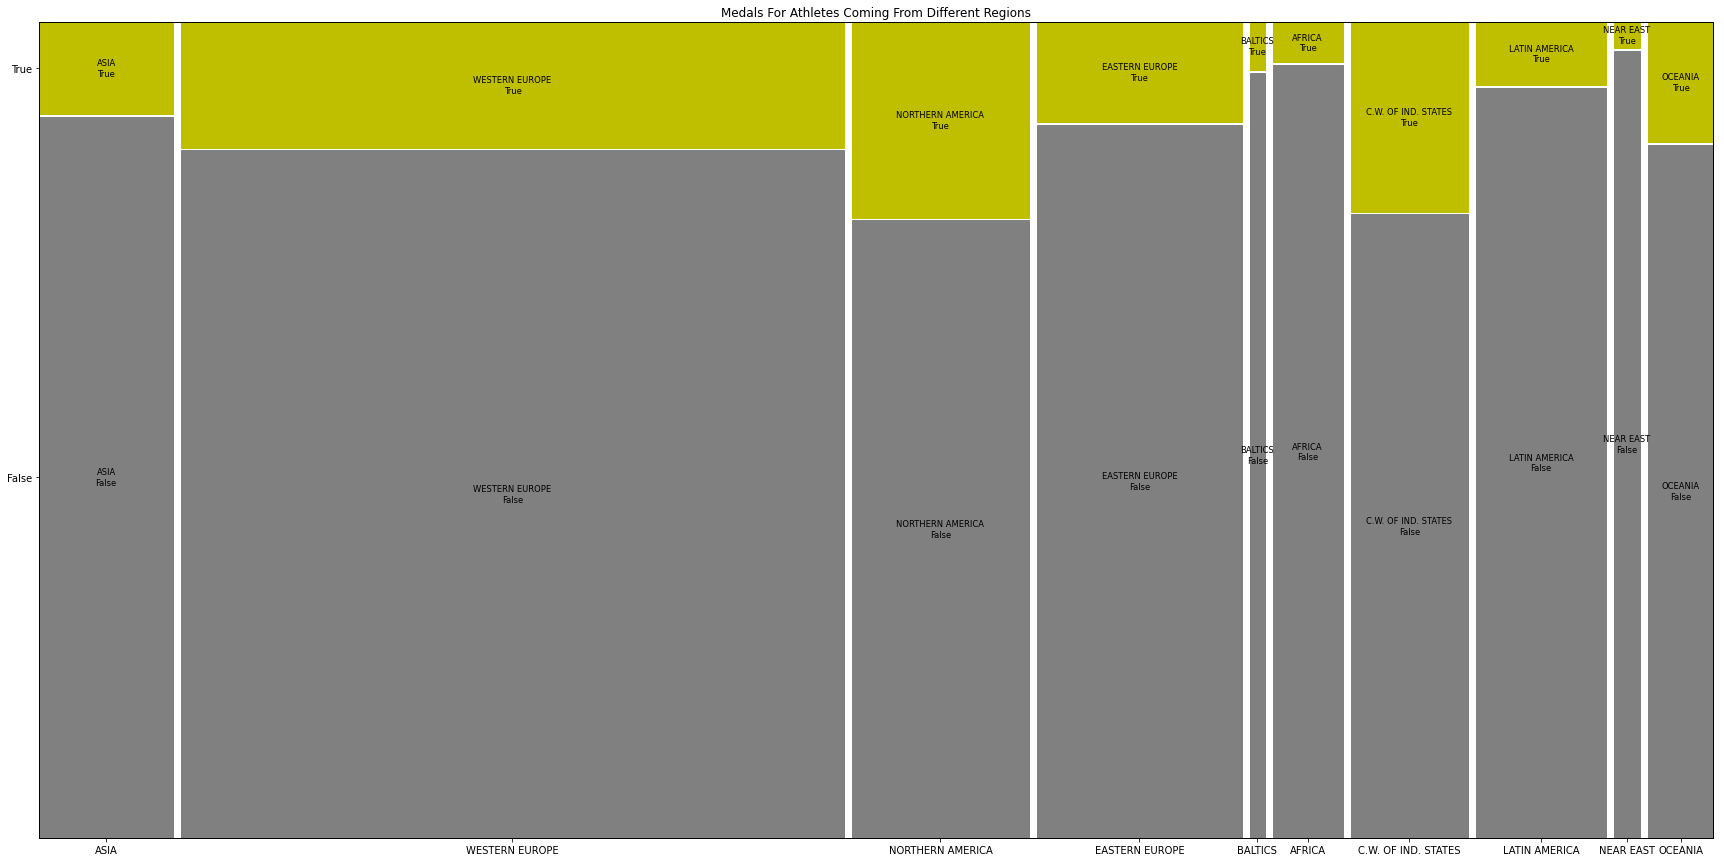

In [27]:
#Create Mosaic Plot
from statsmodels.graphics.mosaicplot import mosaic
props = lambda key: {'color': 'y' if 'True' in key else 'gray'}

plt.rcParams["figure.figsize"]=(30, 15)
t = mosaic(Q1, ['Region','WinMedalsOrNot'],title='Medals For Athletes Coming From Different Regions', properties=props)

In [28]:
#Q2. Does the stereotype that Asian athletes have less chances to win a medal hold true? 
#What about African athletes? Do athletes from Africa have a higher chance of winning medals?

In [29]:
join2.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'Country', 'notes',
       'Region', 'Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)',
       'Coastline (coast/area ratio)', 'Net migration',
       'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
       'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)',
       'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture',
       'Industry', 'Service', 'Total GDP'],
      dtype='object')

In [30]:
#Create a column that shows if an athlete won medals or not, and another column that shows if an athlete is 
#from Asia or not.  Create a cross table, and do chi-square to check whether there is a relationship between 
#winning medals and athletes from Asia. Hence, we can see if the stereotype that Asian people are less athletic, 
#so they are less likely to win medals holds true

In [31]:
#Remember to clean up the white spaces in 'Region' column
join2['Region'] = join2['Region'].str.strip()

In [32]:
# create a new column based on condition from Asia or not and from Africa or not
join2['FromAsia'] = np.where(join2['Region'] == 'ASIA (EX. NEAR EAST)' , True, False)
join2['FromAfrica'] = np.where((join2['Region'] == 'NORTHERN AFRICA') | (join2['Region'] == 'SUB-SAHARAN AFRICA') , True, False)

In [33]:
#Select the columns we want from dataframe join2
Q2 = join2[["Country","Region","Medal","FromAsia","FromAfrica"]]
#Change the NaN values in column "Medal" to "DidNotWinMedals"
Q2['Medal'] = Q2['Medal'].replace(np.nan, 'DidNotWinMedals', regex=True)
Q2

/var/folders/f6/z0d78nj136d487t0dd3bdyh00000gn/T/ipykernel_525/1450749154.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q2['Medal'] = Q2['Medal'].replace(np.nan, 'DidNotWinMedals', regex=True)


,Country,Region,Medal,FromAsia,FromAfrica
0,China,ASIA (EX. NEAR EAST),DidNotWinMedals,True,False
1,China,ASIA (EX. NEAR EAST),DidNotWinMedals,True,False
2,Denmark,WESTERN EUROPE,DidNotWinMedals,False,False
3,Denmark,WESTERN EUROPE,Gold,False,False
4,Netherlands,WESTERN EUROPE,DidNotWinMedals,False,False
...,...,...,...,...,...
271111,Poland,EASTERN EUROPE,DidNotWinMedals,False,False
271112,Poland,EASTERN EUROPE,DidNotWinMedals,False,False
271113,Poland,EASTERN EUROPE,DidNotWinMedals,False,False
271114,Poland,EASTERN EUROPE,DidNotWinMedals,False,False


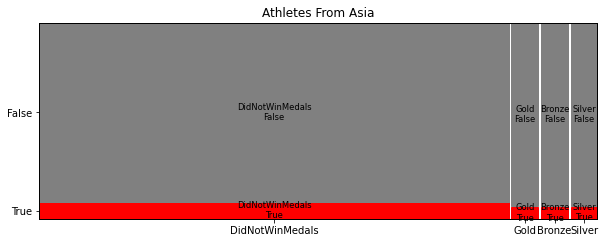

In [34]:
#Create a mosaic plot
from statsmodels.graphics.mosaicplot import mosaic
props = lambda key: {'color': 'r' if 'True' in key else 'gray'}

plt.rcParams["figure.figsize"]=(10, 3.6)
t = mosaic(Q2, ['Medal','FromAsia'],title='Athletes From Asia', properties=props)

In [35]:
#Create a crosstab 
ct = pd.crosstab(Q2.Medal,Q2.FromAsia)
ct

FromAsia,False,True
Medal,,
Bronze,12470,825
DidNotWinMedals,211851,19482
Gold,12549,823
Silver,12291,825


In [36]:
#Add chi-square
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(ct)
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)
print("Expected:")
pd.DataFrame(ex)

chi2 =  222.01277413016604
p-val =  7.372432512668625e-48
degree of freedom =  3
Expected:


,0,1
0,12218.369609,1076.630391
1,212599.631202,18733.368798
2,12289.134142,1082.865858
3,12053.865047,1062.134953


If we both hypothsize that there is no correlation between two variables, for winning medlas with regard to athletes from Asia or not, because the p-value we gained from the analysis of chi-square is smaller than 0.05, we reject the null hypothesis and conclude that there is relationship between "Medal" and athletes from Asia.

As we can see from the expected values from the chi-square crosstab, we can see Asian athletes tend to have a lower value in all Gold, Silver, and Bronze medals. However, although the numbers appear to be a difference up to hundreds, the population data is really large, hence, the differnce is really slow. In conclusion, athletes from Asia do tend to win less medals, but the difference is very small.

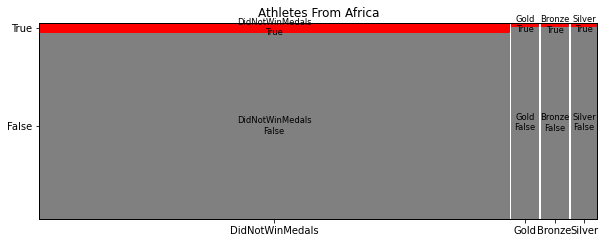

In [37]:
from statsmodels.graphics.mosaicplot import mosaic
#props = lambda key: {'color': 'r' if 'True' in key else 'gray'}

props = lambda key: {'color': 'r' if 'True' in key else 'gray'}
plt.rcParams["figure.figsize"]=(10, 3.6)
t = mosaic(Q2, ['Medal','FromAfrica'],title='Athletes From Africa', properties=props)

From this outcome, it is not surprising that African athletes did not account for most of the medals since we are looking at all the medals in different disciplines. When taking athleticism into account, we should narrow down to the sports that require high athleticsm, such as Track & Field. (Will discuss about that later!)

In [38]:
#Create a crosstab 
ct2 = pd.crosstab(Q2.Medal,Q2.FromAfrica)
ct2

FromAfrica,False,True
Medal,,
Bronze,13072,223
DidNotWinMedals,220438,10895
Gold,13199,173
Silver,12947,169


In [39]:
#Add chi-square
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(ct2)
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)
print("Expected:")
pd.DataFrame(ex)

chi2 =  910.5709595954025
p-val =  4.509221370919479e-197
degree of freedom =  3
Expected:


,0,1
0,12733.023945,561.976055
1,221554.616651,9778.383349
2,12806.769176,565.230824
3,12561.590227,554.409773


Same as Asian athletes, the p-value here is smaller than 0,05, we reject the null hypothesis and conclude that there is relationship between "Medal" and athletes from Africa.


As we can see from the expected values from the chi-square crosstab, we can see African athletes tend to have a lower value in all Gold, Silver, and Bronze medals. However, although the numbers appear to be a difference up to hundreds, the population data is really large, hence, the differnce is really slow. In conclusion, athletes from Africa do NOT tend to win more medals in all sports!

In [40]:
join2["Sport"].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Speed Skating',
       'Cross Country Skiing', 'Athletics', 'Ice Hockey', 'Swimming',
       'Badminton', 'Sailing', 'Biathlon', 'Gymnastics',
       'Art Competitions', 'Alpine Skiing', 'Handball', 'Weightlifting',
       'Wrestling', 'Luge', 'Water Polo', 'Hockey', 'Rowing', 'Bobsleigh',
       'Fencing', 'Equestrianism', 'Shooting', 'Boxing', 'Taekwondo',
       'Cycling', 'Diving', 'Canoeing', 'Tennis', 'Modern Pentathlon',
       'Figure Skating', 'Golf', 'Softball', 'Archery', 'Volleyball',
       'Synchronized Swimming', 'Table Tennis', 'Nordic Combined',
       'Baseball', 'Rhythmic Gymnastics', 'Freestyle Skiing',
       'Rugby Sevens', 'Trampolining', 'Beach Volleyball', 'Triathlon',
       'Ski Jumping', 'Curling', 'Snowboarding', 'Rugby',
       'Short Track Speed Skating', 'Skeleton', 'Lacrosse', 'Polo',
       'Cricket', 'Racquets', 'Motorboating', 'Military Ski Patrol',
       'Croquet', 'Jeu De Paume', 'Roque', 'Al

In [41]:
#Then what is the case in the sport of "Athletics"? Let's narrow it down!
#Select the columns we want from dataframe join2
Q2 = join2[["Country","Region","Medal","FromAsia","FromAfrica","Sport","Event" ]]
#Change the NaN values in column "Medal" to "DidNotWinMedals"
Q2['Medal'] = Q2['Medal'].replace(np.nan, 'DidNotWinMedals', regex=True)
Q2

/var/folders/f6/z0d78nj136d487t0dd3bdyh00000gn/T/ipykernel_525/3932367998.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q2['Medal'] = Q2['Medal'].replace(np.nan, 'DidNotWinMedals', regex=True)


,Country,Region,Medal,FromAsia,FromAfrica,Sport,Event
0,China,ASIA (EX. NEAR EAST),DidNotWinMedals,True,False,Basketball,Basketball Men's Basketball
1,China,ASIA (EX. NEAR EAST),DidNotWinMedals,True,False,Judo,Judo Men's Extra-Lightweight
2,Denmark,WESTERN EUROPE,DidNotWinMedals,False,False,Football,Football Men's Football
3,Denmark,WESTERN EUROPE,Gold,False,False,Tug-Of-War,Tug-Of-War Men's Tug-Of-War
4,Netherlands,WESTERN EUROPE,DidNotWinMedals,False,False,Speed Skating,Speed Skating Women's 500 metres
...,...,...,...,...,...,...,...
271111,Poland,EASTERN EUROPE,DidNotWinMedals,False,False,Luge,Luge Mixed (Men)'s Doubles
271112,Poland,EASTERN EUROPE,DidNotWinMedals,False,False,Ski Jumping,"Ski Jumping Men's Large Hill, Individual"
271113,Poland,EASTERN EUROPE,DidNotWinMedals,False,False,Ski Jumping,"Ski Jumping Men's Large Hill, Team"
271114,Poland,EASTERN EUROPE,DidNotWinMedals,False,False,Bobsleigh,Bobsleigh Men's Four


In [42]:
#Athletics has been contested at every Summer Olympics since the birth of the modern Olympic movement at the 1896 
#Summer Olympics. The athletics program traces its earliest roots to events used in the ancient Greek Olympics. 
#The modern program includes track and field events, road running events, and racewalking events. 

#Hence, we would narrow down the sport type to 'Athletics' 
Athletics = Q2.where(Q2['Sport']=='Athletics')
Athletics.dropna(inplace=True)

In [43]:
#Now we gained the dataframe we want that is restricted only to "Athletics"
Athletics

,Country,Region,Medal,FromAsia,FromAfrica,Sport,Event
26,Netherlands,WESTERN EUROPE,DidNotWinMedals,False,False,Athletics,Athletics Women's 100 metres
27,Netherlands,WESTERN EUROPE,DidNotWinMedals,False,False,Athletics,Athletics Women's 4 x 100 metres Relay
57,Finland,WESTERN EUROPE,DidNotWinMedals,False,False,Athletics,Athletics Men's Shot Put
94,Estonia,BALTICS,DidNotWinMedals,False,False,Athletics,Athletics Men's Pole Vault
95,Norway,WESTERN EUROPE,DidNotWinMedals,False,False,Athletics,Athletics Men's High Jump
...,...,...,...,...,...,...,...
271079,Russia,C.W. OF IND. STATES,DidNotWinMedals,False,False,Athletics,Athletics Women's Shot Put
271080,Russia,C.W. OF IND. STATES,Bronze,False,False,Athletics,Athletics Women's Shot Put
271100,Czech Republic,EASTERN EUROPE,DidNotWinMedals,False,False,Athletics,Athletics Men's Marathon
271102,Russia,C.W. OF IND. STATES,Bronze,False,False,Athletics,Athletics Women's 4 x 400 metres Relay


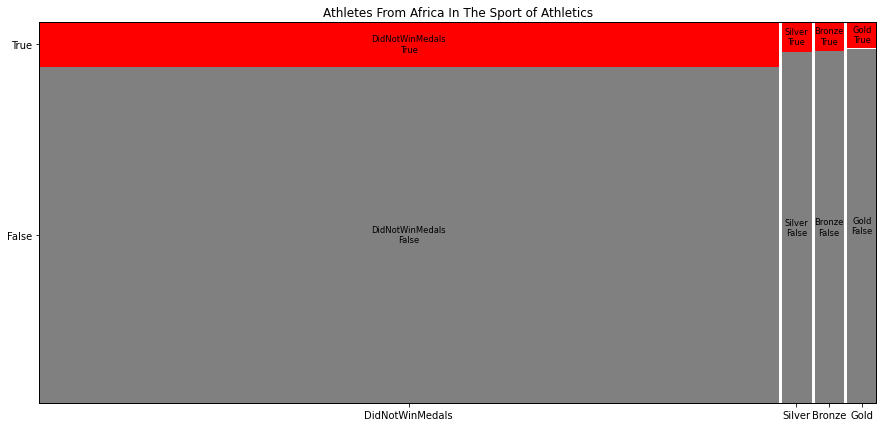

In [44]:
#Create a mosaic plot 
from statsmodels.graphics.mosaicplot import mosaic
props = lambda key: {'color': 'r' if 'True' in key else 'gray'}

plt.rcParams["figure.figsize"]=(15, 7)
t = mosaic(Athletics, ['Medal','FromAfrica'],title='Athletes From Africa In The Sport of Athletics', properties=props)

In [45]:
#Create a crosstab 
ct2 = pd.crosstab(Athletics.Medal,Athletics.FromAfrica)
ct2

FromAfrica,False,True
Medal,,
Bronze,1171,93
DidNotWinMedals,29534,3803
Gold,1232,87
Silver,1216,98


In [46]:
#Add chi-square
from scipy.stats import chi2_contingency
chi2, p, dof, ex = chi2_contingency(ct2)
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)
print("Expected:")
pd.DataFrame(ex)

chi2 =  65.90864404993572
p-val =  3.2060963746232094e-14
degree of freedom =  3
Expected:


,0,1
0,1125.460386,138.539614
1,29683.127276,3653.872724
2,1174.432159,144.567841
3,1169.980179,144.019821


Here, again, with the p-valuesmaller than 0,05, we reject the null hypothesis and conclude that there is relationship between "Medal" and athletes from Africa in the sport "Athletics.

In [47]:
#Now we find out using mosaic plot to show african athletes in the "Athletics" sports is still not precise to interpret 
#Because most of the chance of an athlete is to not win medals, so whatever athlete you are from, you are not likely to 
#win medals, so we should try to compare whether the athlete win medals or not with other atheletes from different regions
#in the sport "Athletics", just like we did in Q1 

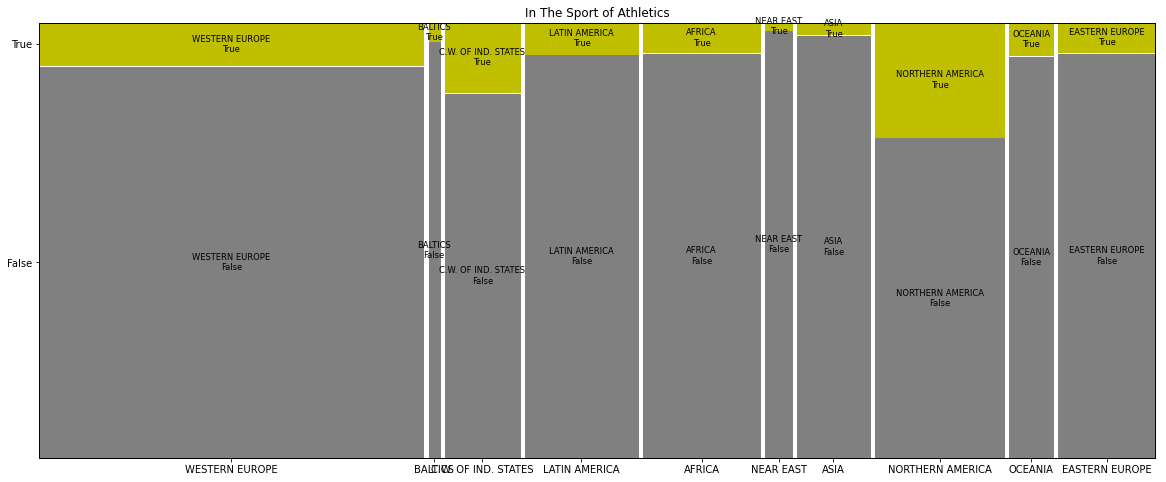

In [48]:
Athletics["WinMedalsOrNot"] = Athletics["Medal"].replace({'DidNotWinMedals':False,'Gold':True, 'Silver':True, 'Bronze':True}, regex=True)


#Rename the region names 
Athletics["Region"] = Athletics["Region"].replace({'ASIA (EX. NEAR EAST)':'ASIA', 'LATIN AMER. & CARIB':'LATIN AMERICA', 'SUB-SAHARAN AFRICA':'AFRICA', 'NORTHERN AFRICA':'AFRICA'})

from statsmodels.graphics.mosaicplot import mosaic
props = lambda key: {'color': 'y' if 'True' in key else 'gray'}

plt.rcParams["figure.figsize"]=(20, 8)
t = mosaic(Athletics, ['Region','WinMedalsOrNot'],title='In The Sport of Athletics', properties=props)

In [49]:
#Find out other sports:
athleteEvents["Event"].unique()

array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Speed Skating Women's 500 metres",
       "Speed Skating Women's 1,000 metres",
       "Cross Country Skiing Men's 10 kilometres",
       "Cross Country Skiing Men's 50 kilometres",
       "Cross Country Skiing Men's 10/15 kilometres Pursuit",
       "Cross Country Skiing Men's 4 x 10 kilometres Relay",
       "Cross Country Skiing Men's 30 kilometres",
       "Athletics Women's 100 metres",
       "Athletics Women's 4 x 100 metres Relay",
       "Ice Hockey Men's Ice Hockey",
       "Swimming Men's 400 metres Freestyle", "Badminton Men's Singles",
       "Sailing Women's Windsurfer",
       "Biathlon Women's 7.5 kilometres Sprint",
       "Swimming Men's 200 metres Breaststroke",
       "Swimming Men's 400 metres Breaststroke",
       "Gymnastics Men's Individual All-Around",
       "Gymnastics Men's Team All-Around",
       "Gymnastics Men's F

In [50]:
#Men's amd Women's Marathon:
Marathon = Q2.where((Q2["Event"]=="Athletics Women's Marathon") | (Q2["Event"]== "Athletics Men's Marathon"))
Marathon.dropna(inplace=True)

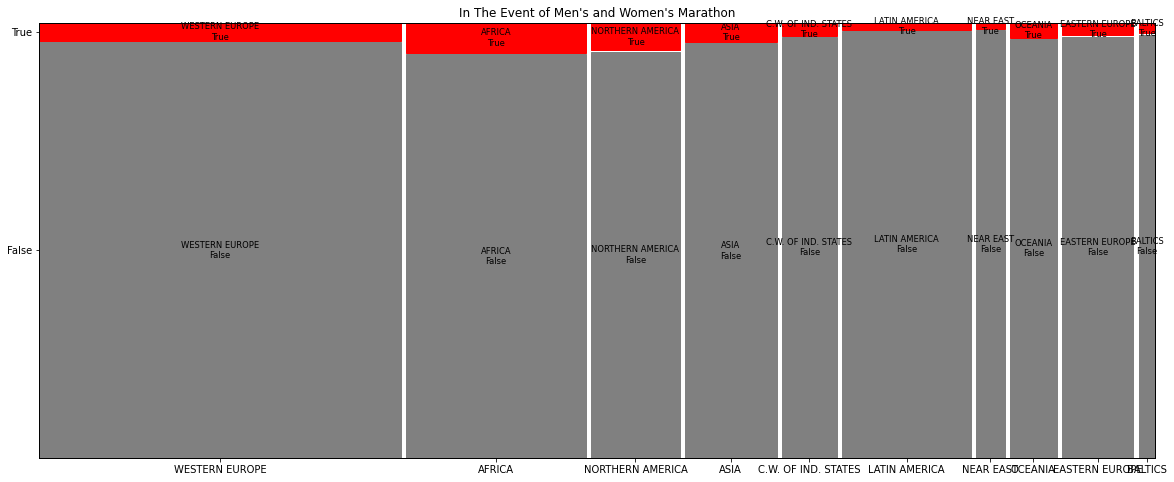

In [51]:
#Create the mosiac plot
Marathon["WinMedalsOrNot"] = Marathon["Medal"].replace({'DidNotWinMedals':False,'Gold':True, 'Silver':True, 'Bronze':True}, regex=True)


#Rename the region names 
Marathon["Region"] = Marathon["Region"].replace({'ASIA (EX. NEAR EAST)':'ASIA', 'LATIN AMER. & CARIB':'LATIN AMERICA', 'SUB-SAHARAN AFRICA':'AFRICA', 'NORTHERN AFRICA':'AFRICA'})

from statsmodels.graphics.mosaicplot import mosaic
props = lambda key: {'color': 'r' if 'True' in key else 'gray'}

plt.rcParams["figure.figsize"]=(20, 8)
t = mosaic(Marathon, ['Region','WinMedalsOrNot'],title="In The Event of Men's and Women's Marathon", properties=props)

In [52]:
#Table Tennis:
TableTennis = Q2.where((Q2["Sport"]=="Table Tennis"))
TableTennis.dropna(inplace=True)

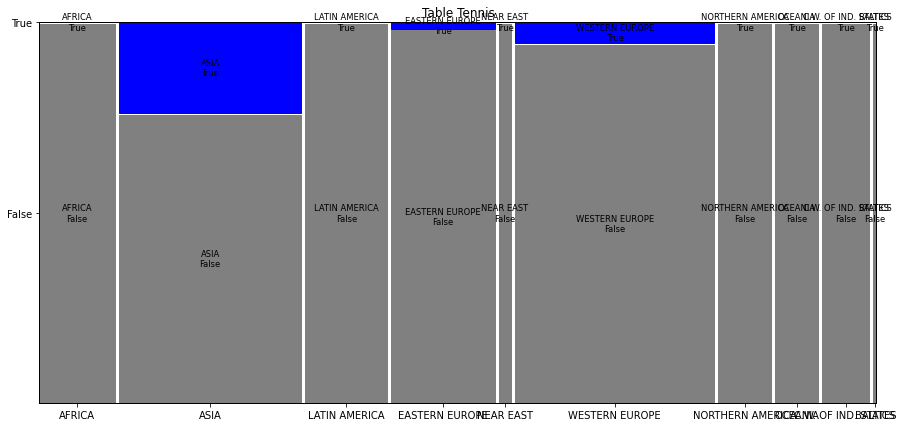

In [53]:
#Create the mosiac plot
TableTennis["WinMedalsOrNot"] = TableTennis["Medal"].replace({'DidNotWinMedals':False,'Gold':True, 'Silver':True, 'Bronze':True}, regex=True)


#Rename the region names 
TableTennis["Region"] = TableTennis["Region"].replace({'ASIA (EX. NEAR EAST)':'ASIA', 'LATIN AMER. & CARIB':'LATIN AMERICA', 'SUB-SAHARAN AFRICA':'AFRICA', 'NORTHERN AFRICA':'AFRICA'})

from statsmodels.graphics.mosaicplot import mosaic
props = lambda key: {'color': 'b' if 'True' in key else 'gray'}

plt.rcParams["figure.figsize"]=(15, 7)
t = mosaic(TableTennis, ['Region','WinMedalsOrNot'],title="Table Tennis", properties=props)

In [54]:
#Q3 
#Are there more and more women athletes rising and shining in the glorious Olympics games? 
#Moreover, do countries with better economic levels tend to send more female athletes?

In [55]:
join2.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal', 'Country', 'notes',
       'Region', 'Population', 'Area (sq. mi.)', 'Pop. Density (per sq. mi.)',
       'Coastline (coast/area ratio)', 'Net migration',
       'Infant mortality (per 1000 births)', 'GDP ($ per capita)',
       'Literacy (%)', 'Phones (per 1000)', 'Arable (%)', 'Crops (%)',
       'Other (%)', 'Climate', 'Birthrate', 'Deathrate', 'Agriculture',
       'Industry', 'Service', 'Total GDP', 'FromAsia', 'FromAfrica'],
      dtype='object')

In [56]:
Q3 = join2[["Country","Region","Sex","Season", "Medal", 'GDP ($ per capita)', 'Year']]
Q3.head()

,Country,Region,Sex,Season,Medal,GDP ($ per capita),Year
0,China,ASIA (EX. NEAR EAST),M,Summer,NaN,5000.0,1992
1,China,ASIA (EX. NEAR EAST),M,Summer,NaN,5000.0,2012
2,Denmark,WESTERN EUROPE,M,Summer,NaN,31100.0,1920
3,Denmark,WESTERN EUROPE,M,Summer,Gold,31100.0,1900
4,Netherlands,WESTERN EUROPE,F,Winter,NaN,28600.0,1988


In [57]:
#There are also some white spaces in the "Region" column, let's clean them up:
Q3['Region'] = Q3['Region'].str.strip()

#Rename the region names 
Q3["Region"] = Q3["Region"].replace({'ASIA (EX. NEAR EAST)':'ASIA', 'LATIN AMER. & CARIB':'LATIN AMERICA', 'SUB-SAHARAN AFRICA':'AFRICA', 'NORTHERN AFRICA':'AFRICA'})


/var/folders/f6/z0d78nj136d487t0dd3bdyh00000gn/T/ipykernel_525/3047852894.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q3['Region'] = Q3['Region'].str.strip()
/var/folders/f6/z0d78nj136d487t0dd3bdyh00000gn/T/ipykernel_525/3047852894.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q3["Region"] = Q3["Region"].replace({'ASIA (EX. NEAR EAST)':'ASIA', 'LATIN AMER. & CARIB':'LATIN AMERICA', 'SUB-SAHARAN AFRICA':'AFRICA', 'NORTHERN AFRICA':'AFRICA'})


<AxesSubplot:xlabel='Year', ylabel='count'>

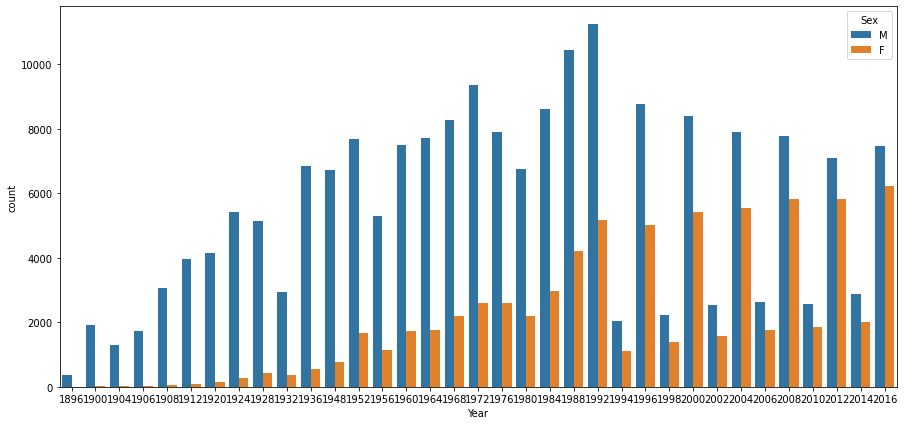

In [58]:
sns.countplot(data=Q3, x="Year", hue="Sex")

/var/folders/f6/z0d78nj136d487t0dd3bdyh00000gn/T/ipykernel_525/2486490025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Q3['isFemaleAthlete'] = Q3['Sex'].replace({'F':1,'M':0})


[Text(0.5, 1.0, 'Female Athelte Percentage Over The Years')]

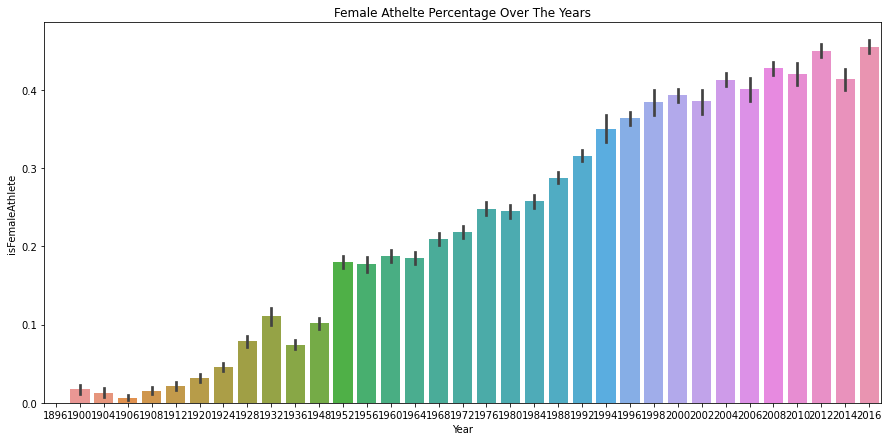

In [59]:
#Use barplot to show how many female athletes account for the total athletes over the years
Q3['isFemaleAthlete'] = Q3['Sex'].replace({'F':1,'M':0})

sns.barplot(x='Year',y='isFemaleAthlete',data=Q3).set(title='Female Athelte Percentage Over The Years')

In [60]:
#Do countries with better economic levels tend to send more female athletes?

In [61]:
countriesForFemale = Q3.groupby(['Country','GDP ($ per capita)'])[['isFemaleAthlete']].sum()
countriesForFemale = countriesForFemale.reset_index()
countriesForFemale

,Country,GDP ($ per capita),isFemaleAthlete
0,Afghanistan,700.0,5
1,Albania,4500.0,27
2,Algeria,6000.0,94
3,American Samoa,8000.0,7
4,Andorra,19000.0,42
...,...,...,...
176,Venezuela,4800.0,221
177,Vietnam,2500.0,76
178,Yemen,800.0,4
179,Zambia,800.0,19


In [62]:
dfLast = countriesForFemale.sort_values(by=['GDP ($ per capita)'], ascending=False)
dfLast

,Country,GDP ($ per capita),isFemaleAthlete
95,Luxembourg,55100.0,73
172,United States,37800.0,5590
121,Norway,37800.0,1130
19,Bermuda,36000.0,41
31,Cayman Islands,35000.0,12
...,...,...,...
26,Burundi,600.0,14
161,Tanzania,600.0,21
98,Malawi,600.0,14
149,Somalia,500.0,5


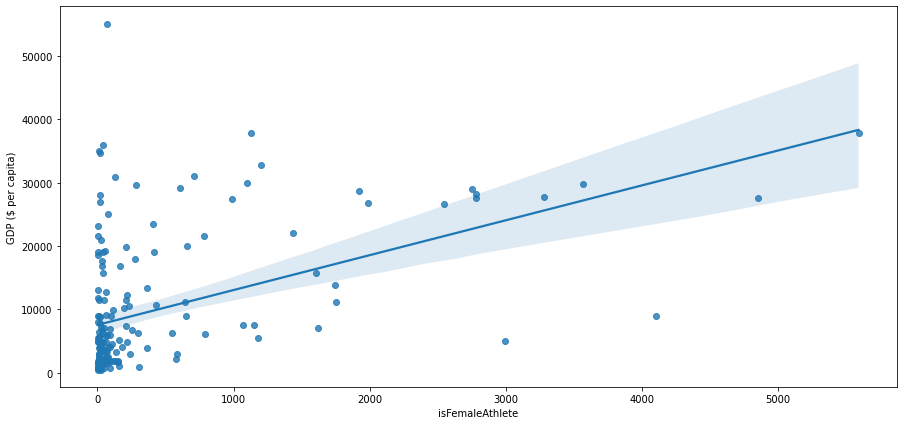

In [63]:
#Using regplot to plot the relationship between two variables:
ax = sns.regplot(x="isFemaleAthlete", y='GDP ($ per capita)', data=countriesForFemale)

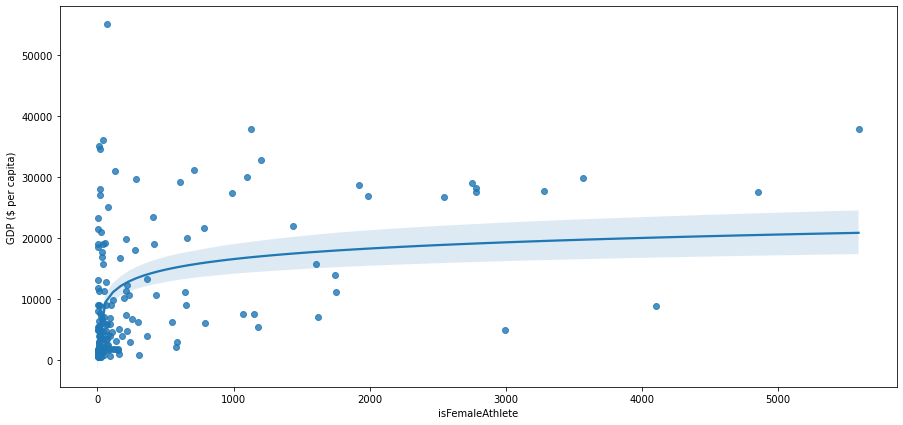

In [64]:
ax = sns.regplot(x="isFemaleAthlete", y='GDP ($ per capita)', data=countriesForFemale, logx=True)

In [65]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

#change the column "GDP ($ per capita)" to "GDP" to be read in smf.ols
countriesForFemale = countriesForFemale.rename(columns={'GDP ($ per capita)': 'GDP'})


model1 = smf.ols('GDP ~ isFemaleAthlete', data=countriesForFemale).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    GDP   R-squared:                       0.217
Model:                            OLS   Adj. R-squared:                  0.213
Method:                 Least Squares   F-statistic:                     49.75
Date:                Wed, 08 Dec 2021   Prob (F-statistic):           3.68e-11
Time:                        14:47:04   Log-Likelihood:                -1909.3
No. Observations:                 181   AIC:                             3823.
Df Residuals:                     179   BIC:                             3829.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        7531.7913    756.091      9.961      0.000    6039.793    9023.789
isFemaleAthlete     5.5078      0.781      7.053      0.000       3.967       7.049
==============================================================================
Omnibus:                       72.324   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.359
Skew:                           1.691   Prob(JB):                     2.55e-45
Kurtosis:                       6.973   Cond. No.                     1.06e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Here, we want to analyze the effect of X on Y, which is the column 'isFemaleAthlete' on 'GDP'. 
 
And the coefficient term, 5.5078, tells us the change in Y for a unit change in X. Hence, if 'isFemaleAthlete' rises by one unit then 'GDP' rises by 5.5078.